In [84]:
from rich.jupyter import print
from rich.markdown import Markdown

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

def get_files(dir_path):
    file_list = os.listdir(dir_path)
    all_files = list()
    # Iterate over all the entries
    for entry in file_list:
        # Create full path
        full_path = os.path.join(dir_path, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(full_path):
            all_files = all_files + get_files(full_path)
        else:
            all_files.append(full_path)
                
    return all_files

# Set 5 Analysis

This test set focuses on measuring and comparing the performance between two scenarios:

1. 1 publisher and 1 subscriber on the same virtual machine.
2. 1 publisher on a virtual machine and 1 subscriber on a different virtual machine.

|   Parameter   |    Value    |
|:-------------:|:-----------:|
|  Data Length  |  100 Bytes  |
| Test Duration | 300 seconds |
| Latency Count |     100     |
|  Reliability  |  `reliable` |
| Communication |  `unicast` |

Here are the two configurations:

| Test |    Configuration   |
|:----:|:------------------:|
|  5.1 |    VM 1: 1P + 1S   |
|  5.2 | VM 1: 1P, VM 2: 1S |

## Metric Summaries

## Single Machine Latency

|  Metric |  Run 1 |  Run 2 |  Run 3 |
|---------|:------:|:------:|:------:|
|Count    | 319266 | 297706 | 299444 |
|Mean     |   240  |   215  |   215  |
|Std Dev  |   89   |   98   |   333  |
|Min      |   106  |   72   |   67   |
|Max      |  5794  |  11362 |  85695 |
|25%      |   155  |   170  |   167  |
|50%      |   201  |   186  |   190  |
|75%      |   320  |   316  |   205  |

The latency results above show us that the single machine test produces consistently lower latencies than the multi machine tests.

## Multi Machine Latency
| Metric  |  Run 1 |  Run 2 |  Run 3 |
|---------|:------:|:------:|:------:|
| Count   | 349874 | 330219 | 280971 |
| Mean    |   174  |   198  |   206  |
| Std Dev |   113  |   342  |   653  |
| Min     |   56   |   56   |   54   |
| Max     |  23253 |  22286 | 172043 |
| 25%     |   148  |   152  |   147  |
| 50%     |   167  |   172  |   167  |
| 75%     |   187  |   195  |   188  |

## Single Plot Latency Comparison

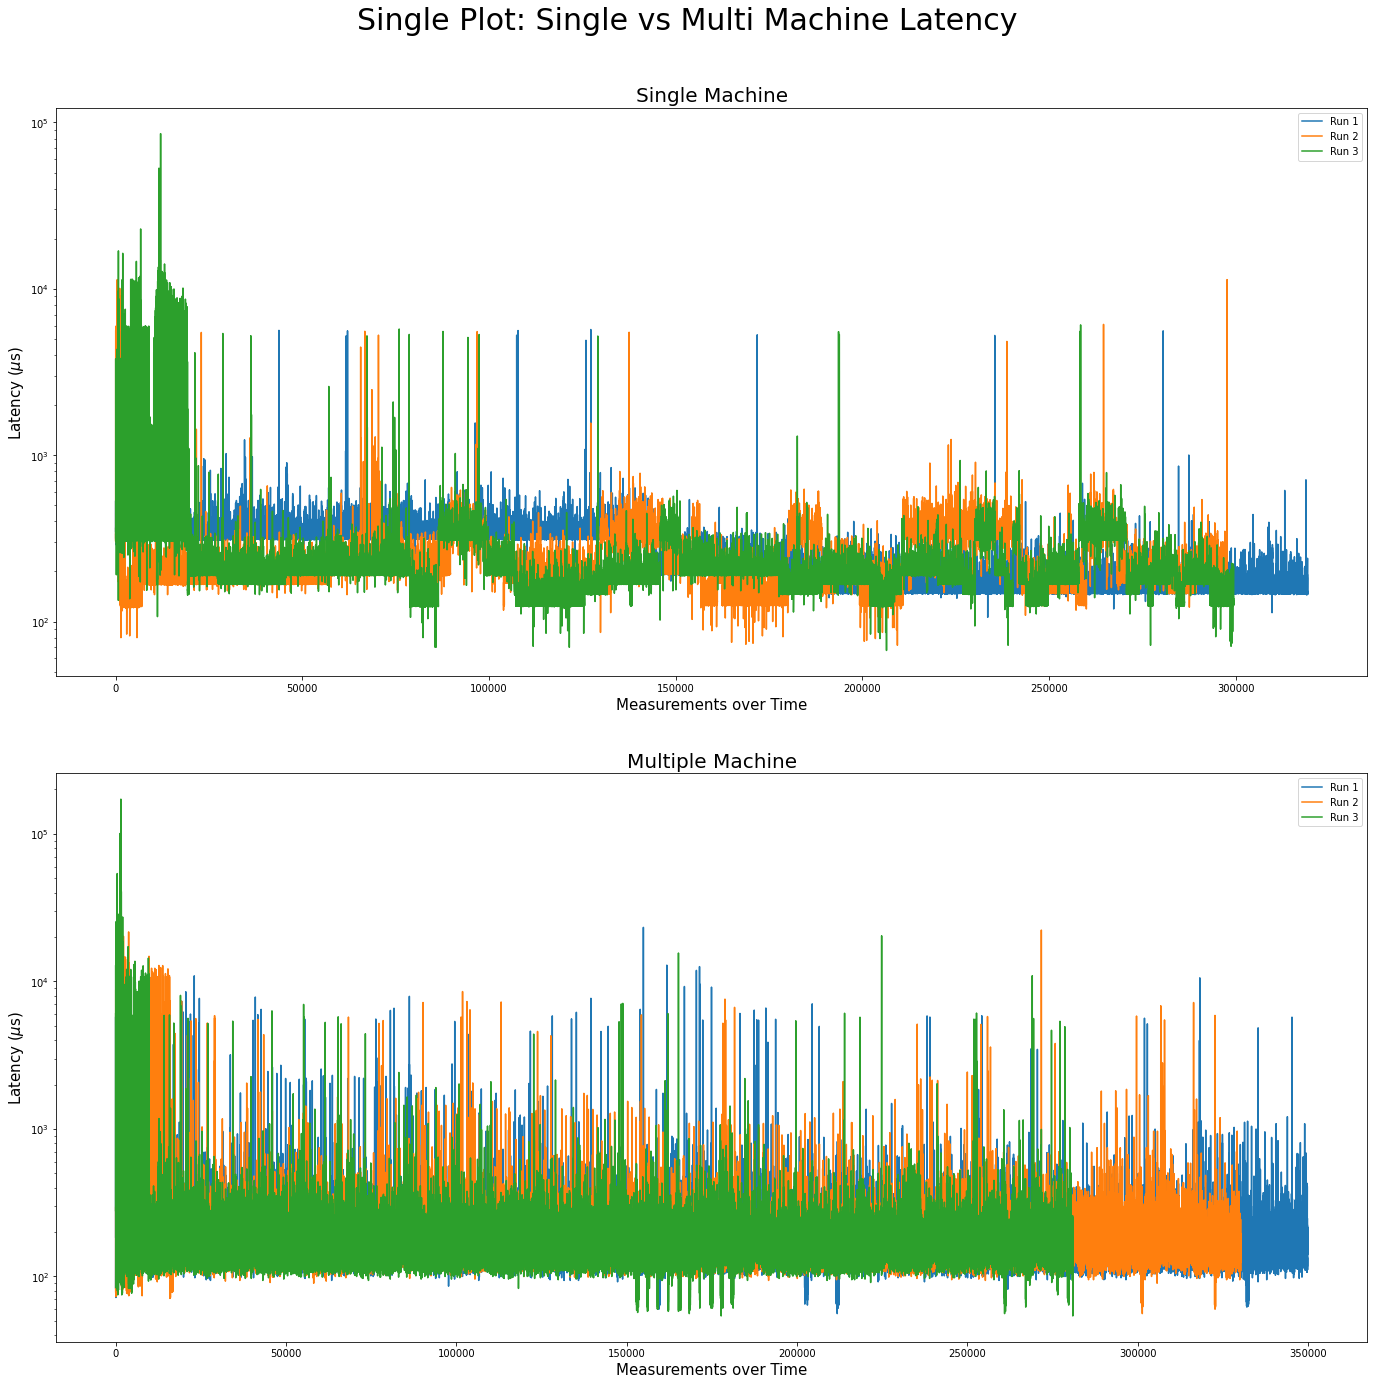

In [91]:
def describe_helper(series):
    splits = str(series.describe()).split()
    keys, values = "", ""
    for i in range(0, len(splits), 2):
        keys += "{:8}\n".format(splits[i])
        values += "{:>8}\n".format(splits[i+1])
    return keys, values

def plot_latencies(files, index, title):
    latency_files = [file for file in files if "clean_pub_0" in file]
    for file in latency_files:
        run = latency_files.index(file) + 1
        df = pd.read_csv(file)["Latency"]
        axes[index].plot(df)
        axes[index].set_yscale("log")
        axes[index].set_title(title, fontsize=20)
        axes[index].set_ylabel("Latency ($\mu$s)", fontsize=15)
        axes[index].set_xlabel("Measurements over Time", fontsize=15)
#         print(title + " Run " + str(run) + ":")
#         print(df.describe())
#         axes[index].text(df.max() * .4 * run, df.min() * 20 * run, df.describe().to_string(), backgroundcolor="white")
    
    axes[index].legend(["Run 1", "Run 2", "Run 3"])

# sm = single machine, mm = multiple machine
sm_files = get_files('data/5_1_single_machine_communication')
mm_files = get_files('data/5_2_multi_machine_communication')

figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
figure.suptitle("Single Plot: Single vs Multi Machine Latency", fontsize=30)

plot_latencies(sm_files, 0, "Single Machine")
plot_latencies(mm_files, 1, "Multiple Machine")

plt.tight_layout(pad=4)

## Multi Plot Latency Comparison

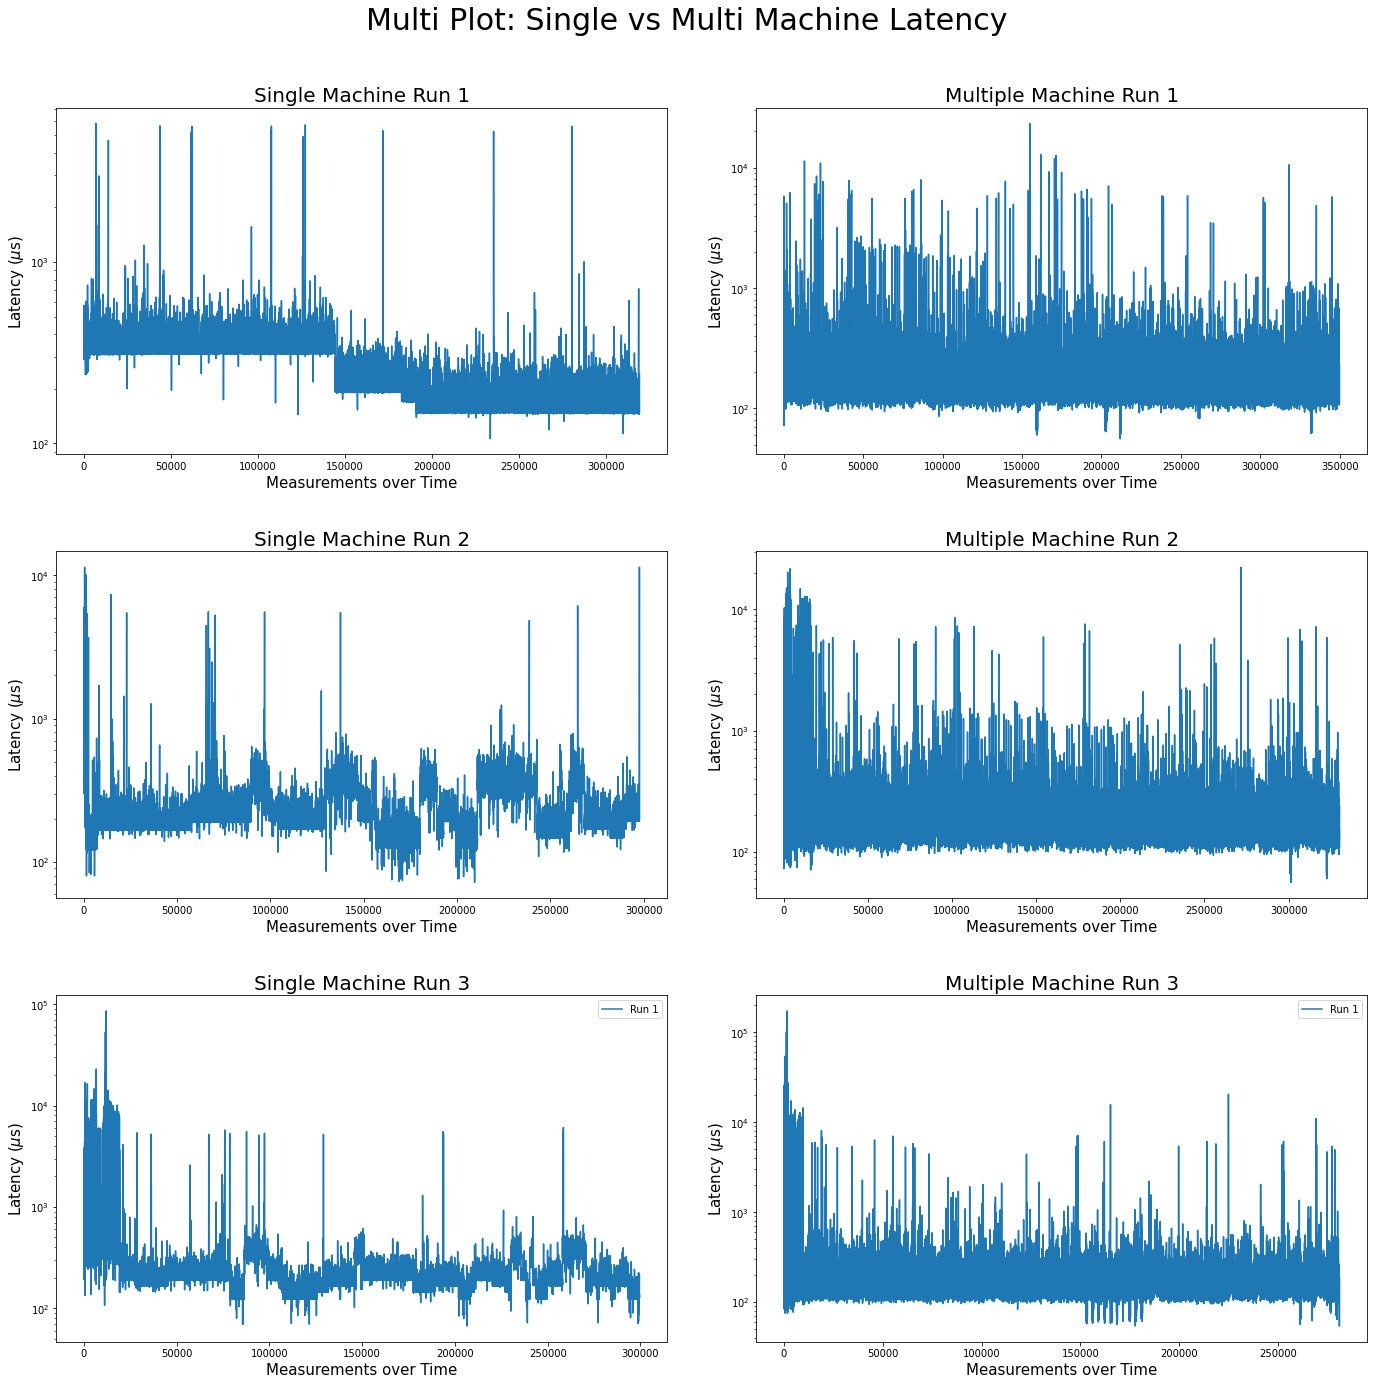

In [86]:
def plot_latencies(files, x, title):
    latency_files = [file for file in files if "clean_pub_0" in file]
    for file in latency_files:
        y = latency_files.index(file)
        index = (y, x)
        df = pd.read_csv(file)["Latency"]
        axes[index].plot(df)
        axes[index].set_yscale("log")
        axes[index].set_title(title + " Run " + str(y + 1), fontsize=20)
        axes[index].set_ylabel("Latency ($\mu$s)", fontsize=15)
        axes[index].set_xlabel("Measurements over Time", fontsize=15)
    
    axes[index].legend(["Run 1", "Run 2", "Run 3"])

# sm = single machine, mm = multiple machine
sm_files = get_files('data/5_1_single_machine_communication')
mm_files = get_files('data/5_2_multi_machine_communication')

figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
figure.suptitle("Multi Plot: Single vs Multi Machine Latency", fontsize=30)

plot_latencies(sm_files, 0, "Single Machine")
plot_latencies(mm_files, 1, "Multiple Machine")

plt.tight_layout(pad=4)